In [1]:
import pandas as pd
import numpy as np
data = {
    'Area': [2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494],
    'Bathrooms': [3, 3, 3, 2, 4, 4, 3, 3, 3, 3],
    'Label': ['Good','Good','Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good','Good','Good'] 
}
df = pd.DataFrame(data)
df

,Area,Bathrooms,Label
0,2104,3,Good
1,1600,3,Good
2,2400,3,Good
3,1416,2,Bad
4,3000,4,Bad
5,1985,4,Good
6,1534,3,Bad
7,1427,3,Good
8,1380,3,Good
9,1494,3,Good


In [2]:
df.describe()

,Area,Bathrooms
count,10.0000,10.000000
mean,1834.0000,3.100000
std,535.6676,0.567646
min,1380.0000,2.000000
25%,1443.7500,3.000000
50%,1567.0000,3.000000
75%,2074.2500,3.000000
max,3000.0000,4.000000


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data = np.array(df[['Area', 'Bathrooms']])
data = sc.fit_transform(data)

encoder = LabelEncoder()
target = encoder.fit_transform(df['Label'])


# target = np.array(df['Label'])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=40)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='leaky_relu', input_dim=2))
# model.add(keras.layers.Dense(64, activation='leaky_relu'))

model.add(keras.layers.Dense(24, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 24)                72        
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


2023-09-07 15:24:22.938892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-07 15:24:22.939015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('quiz_best_model_3.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history= model.fit(data, target, epochs=300, validation_data=(data, target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300


2023-09-07 15:24:23.070340: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-07 15:24:23.207573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 402ms/step - loss: 0.7407 - accuracy: 0.4000 - val_loss: 0.6102 - val_accuracy: 0.8000
Epoch 2/300
1/1 [==============================] - 0s 45ms/step - loss: 0.6102 - accuracy: 0.8000 - val_loss: 0.5339 - val_accuracy: 0.8000
Epoch 3/300
1/1 [==============================] - 0s 44ms/step - loss: 0.5339 - accuracy: 0.8000 - val_loss: 0.4732 - val_accuracy: 0.8000
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4732 - accuracy: 0.8000

2023-09-07 15:24:23.412471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 46ms/step - loss: 0.4732 - accuracy: 0.8000 - val_loss: 0.4346 - val_accuracy: 0.8000
Epoch 5/300
1/1 [==============================] - 0s 48ms/step - loss: 0.4346 - accuracy: 0.8000 - val_loss: 0.3647 - val_accuracy: 0.9000
Epoch 6/300
1/1 [==============================] - 0s 49ms/step - loss: 0.3647 - accuracy: 0.9000 - val_loss: 0.3515 - val_accuracy: 0.9000
Epoch 7/300
1/1 [==============================] - 0s 47ms/step - loss: 0.3515 - accuracy: 0.9000 - val_loss: 0.3443 - val_accuracy: 0.9000
Epoch 8/300
1/1 [==============================] - 0s 42ms/step - loss: 0.3443 - accuracy: 0.9000 - val_loss: 0.3317 - val_accuracy: 0.9000
Epoch 9/300
1/1 [==============================] - 0s 43ms/step - loss: 0.3317 - accuracy: 0.9000 - val_loss: 0.2972 - val_accuracy: 0.9000
Epoch 10/300
1/1 [==============================] - 0s 45ms/step - loss: 0.2972 - accuracy: 0.9000 - val_loss: 0.2938 - val_accuracy: 0.9000
Epoch 11/300
1/1 [=============

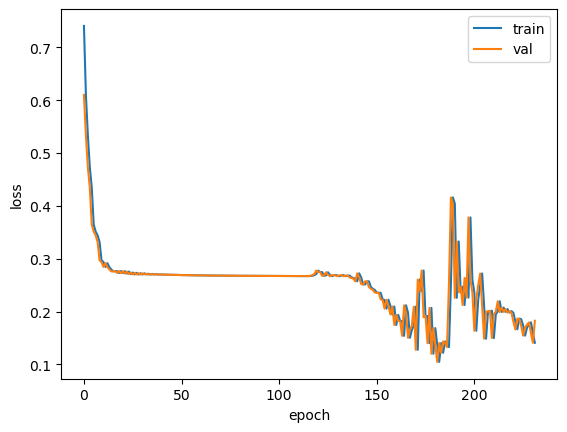

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model.evaluate(data, target)

1/1 [==============================] - 0s 16ms/step - loss: 0.1048 - accuracy: 1.0000


[0.10481244325637817, 1.0]

In [9]:
model.evaluate(test_input, test_target)

1/1 [==============================] - 0s 42ms/step - loss: 2.3610e-04 - accuracy: 1.0000


[0.00023609906202182174, 1.0]

In [10]:
model.predict([[2104,3]])

1/1 [==============================] - 0s 65ms/step


2023-09-07 15:24:32.054854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0., 1.]], dtype=float32)

In [13]:
# 모델을 사용해 예측 수행
predictions = model.predict(data)

# 가장 높은 확률값을 갖는 인덱스를 선택
predicted_indices = np.argmax(predictions, axis=1)

# 인코딩된 라벨을 원래의 라벨로 변환
original_labels = encoder.inverse_transform(predicted_indices)

print(original_labels)

1/1 [==============================] - 0s 44ms/step
['Good' 'Good' 'Good' 'Bad' 'Bad' 'Good' 'Bad' 'Good' 'Good' 'Good']


2023-09-07 15:27:04.997939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [ ]:
train_input

In [ ]:
train_target

In [ ]:
test_input

In [ ]:
test_target

In [ ]:
model.get_weights()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

# Your provided data
data = {
    'Area': [2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494],
    'Bathrooms': [3, 3, 3, 2, 4, 4, 3, 3, 3, 3],
    'Label': ['Good','Good','Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good','Good','Good'] 
}
df = pd.DataFrame(data)


X = df[['Area', 'Bathrooms']].values
encoder = LabelEncoder()
y = encoder.fit_transform(df['Label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_dim=2),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),

    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the model
checkpoint_cb = keras.callbacks.ModelCheckpoint('quiz_best_model_3.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history= model.fit(X, y, epochs=300,  validation_data=(X, y), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(train_input, train_target)

In [ ]:
model.evaluate(test_input, test_target)

In [ ]:
train_input

In [ ]:
encoder.inverse_transform(train_target)

In [ ]:
test_input

In [ ]:
encoder.inverse_transform(test_target)

In [ ]:
data